<a href="https://colab.research.google.com/github/Solostriker/Predictive-Modeling-and-Risk-Assessment-of-Near-Earth-Objects-NEOs-/blob/main/nasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn xgboost statsmodels

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

In [3]:
df = pd.read_csv('../content/sample_data/nasa.csv')
df.head(2)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy

def run_all_models(X_train, X_test, y_train, y_test):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
        "LDA": LinearDiscriminantAnalysis(),
        "GPC": GaussianProcessClassifier()
    }

    model_performance = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

def train_sequential_model(X_train, X_test, y_train, y_test):
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test, y_test)
    return {"Model": "Sequential", "Accuracy": accuracy}

def automate_pca(pca_components, X_train, X_test, y_train, y_test):
    pca = PCA(n_components=pca_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    models = run_all_models(X_train_pca, X_test_pca, y_train, y_test)
    sequential_model_result = train_sequential_model(X_train_pca, X_test_pca, y_train, y_test)
    models = models.append(sequential_model_result, ignore_index=True)
    return models

def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df: pd.DataFrame) -> pd.DataFrame:
    column_entropy_info = {}
    for col in df.columns:
        probabilities = labels_to_probabilities(df[col])
        entropy_value = entropy(probabilities, base=2)
        column_entropy_info[col] = {'entropy': entropy_value}
    return pd.DataFrame(column_entropy_info)



In [5]:
df["Equinox"].value_counts()


Equinox
J2000    4687
Name: count, dtype: int64

In [6]:
df.drop(["Equinox", "Neo Reference ID", "Name", "Close Approach Date", "Orbit Determination Date", "Orbiting Body"], axis=1, inplace=True)

df.shape

(4687, 34)

In [7]:
from collections import Counter

def calculate_class_distribution(df):
    target = df.iloc[:, -1]
    class_counts = Counter(target)
    total_samples = len(target)

    class_distribution = {}
    for label, count in class_counts.items():
        percentage = (count / total_samples) * 100
        class_distribution[label] = {
            "Count": count,
            "Percentage": percentage
        }

    return class_distribution

class_distribution = calculate_class_distribution(df)
for label, info in class_distribution.items():
    print(f"Class={label}, Count={info['Count']}, Percentage={info['Percentage']:.3f}%")

Class=True, Count=755, Percentage=16.108%
Class=False, Count=3932, Percentage=83.892%


<Axes: >

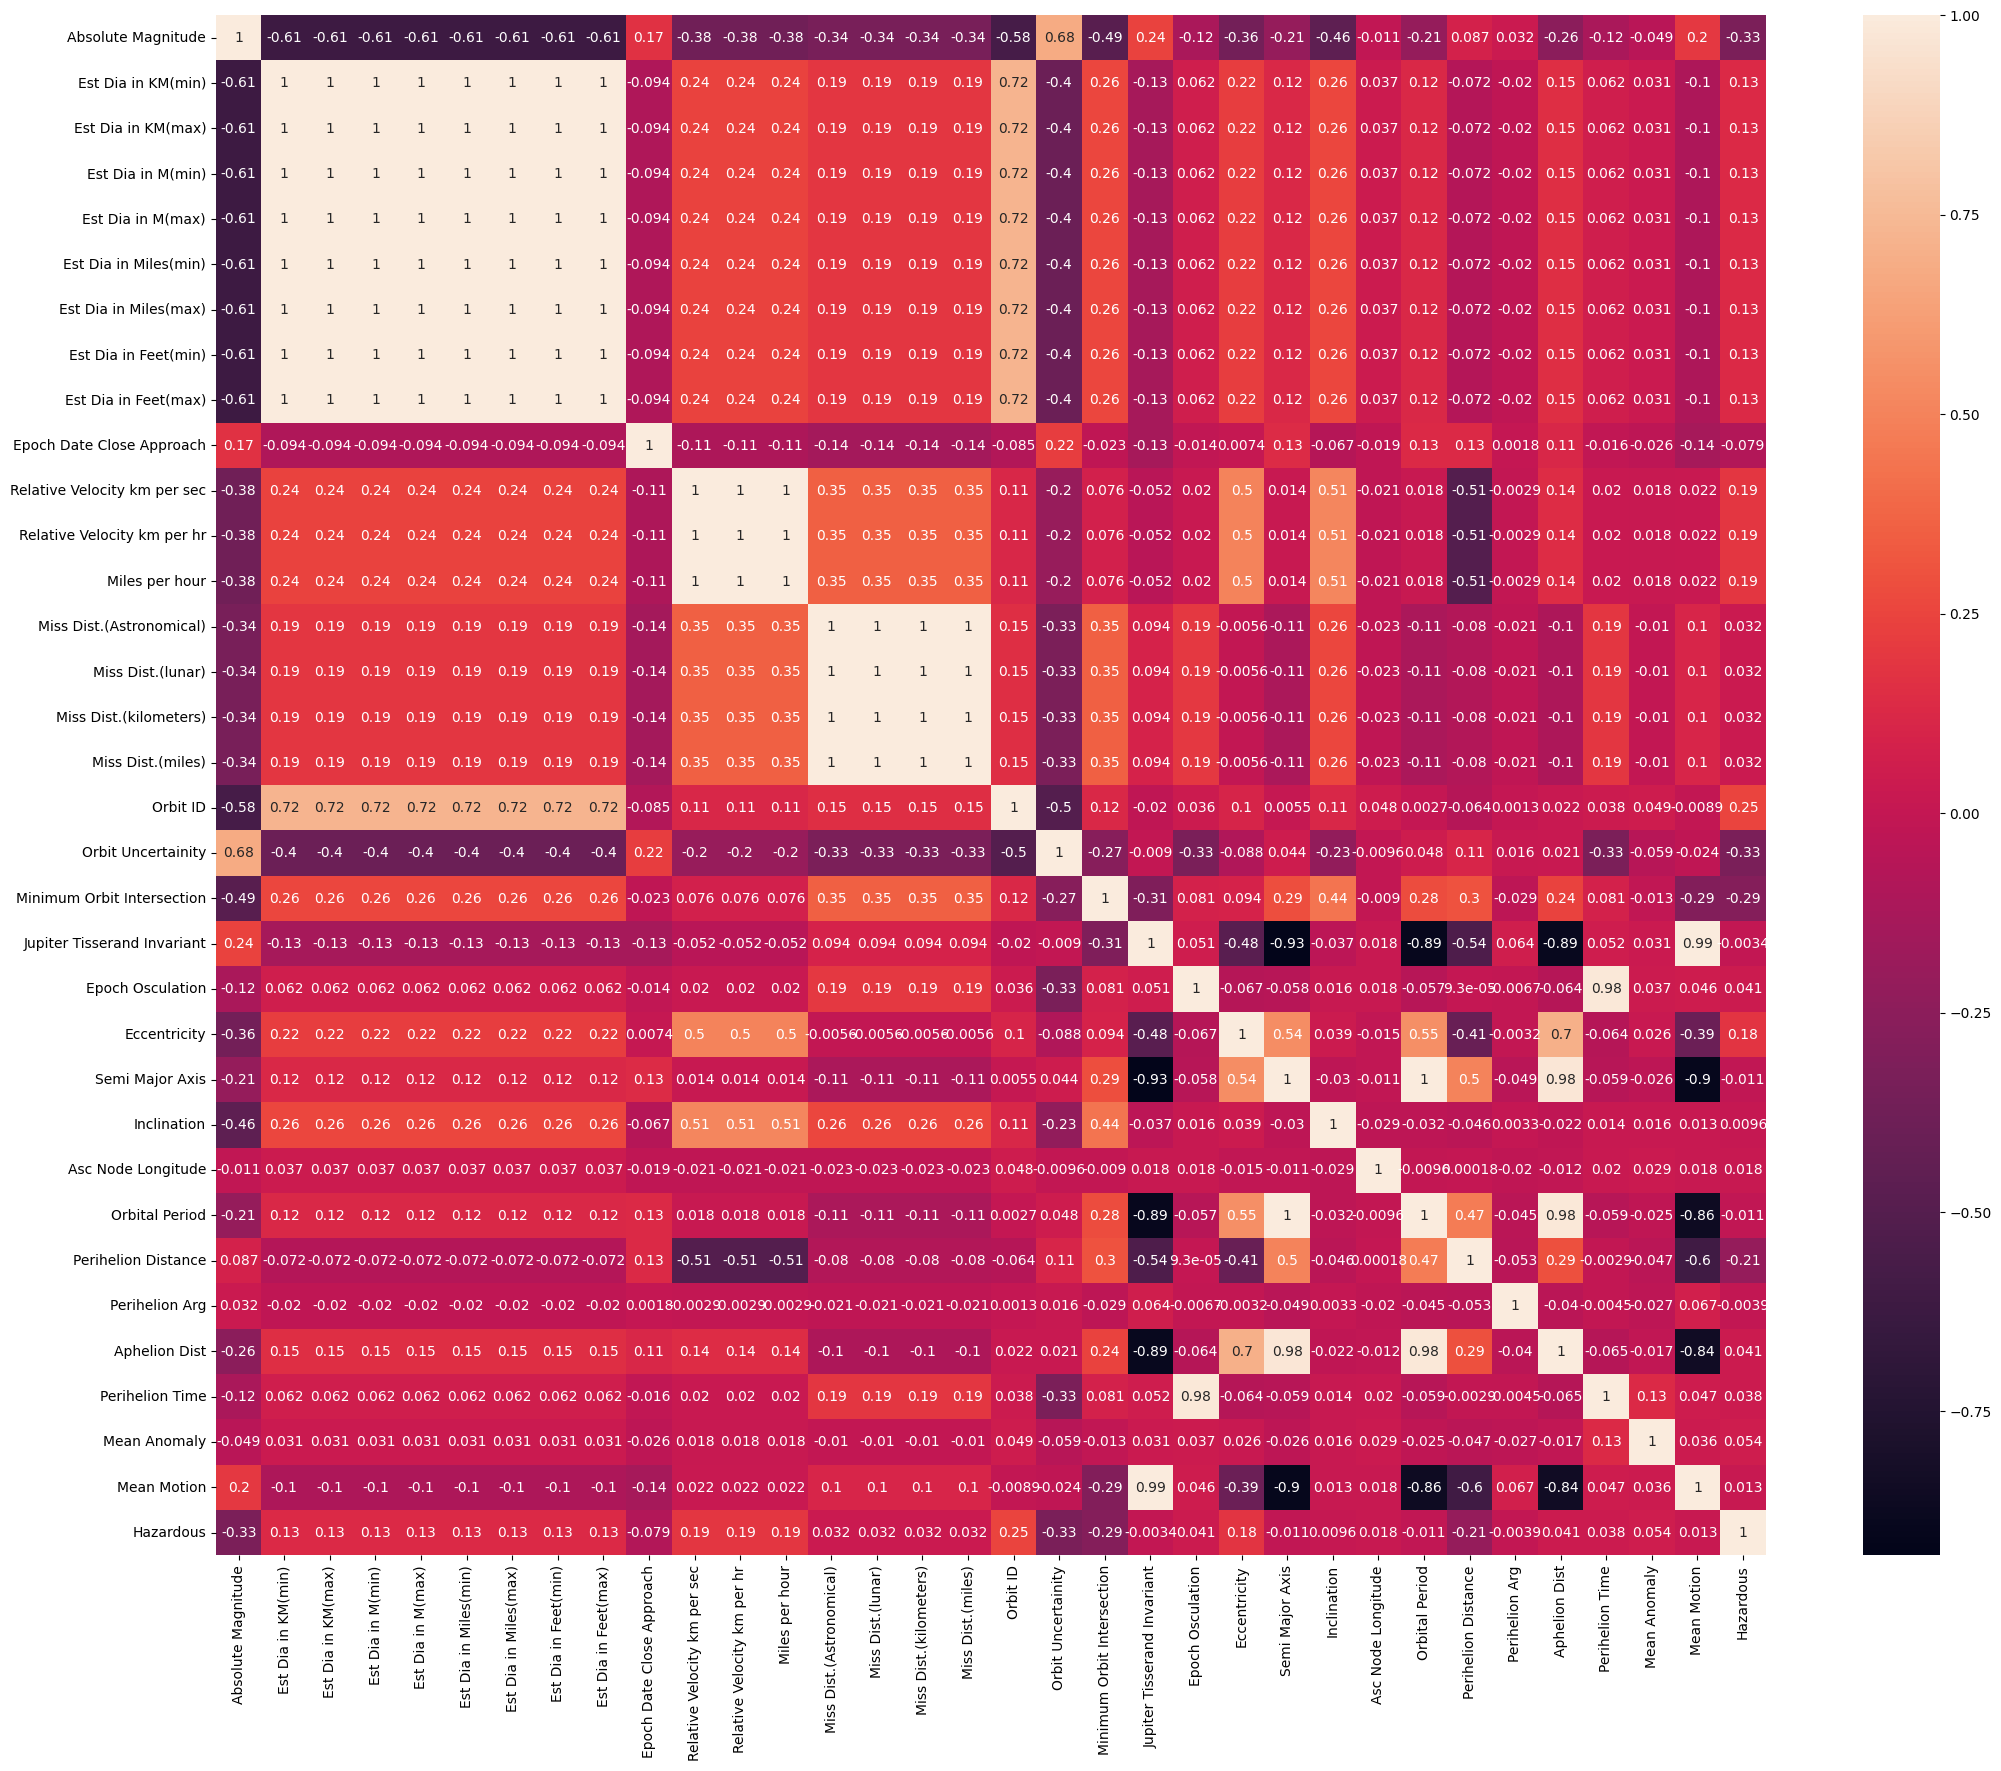

In [ ]:
relations = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(data=relations, annot=True)

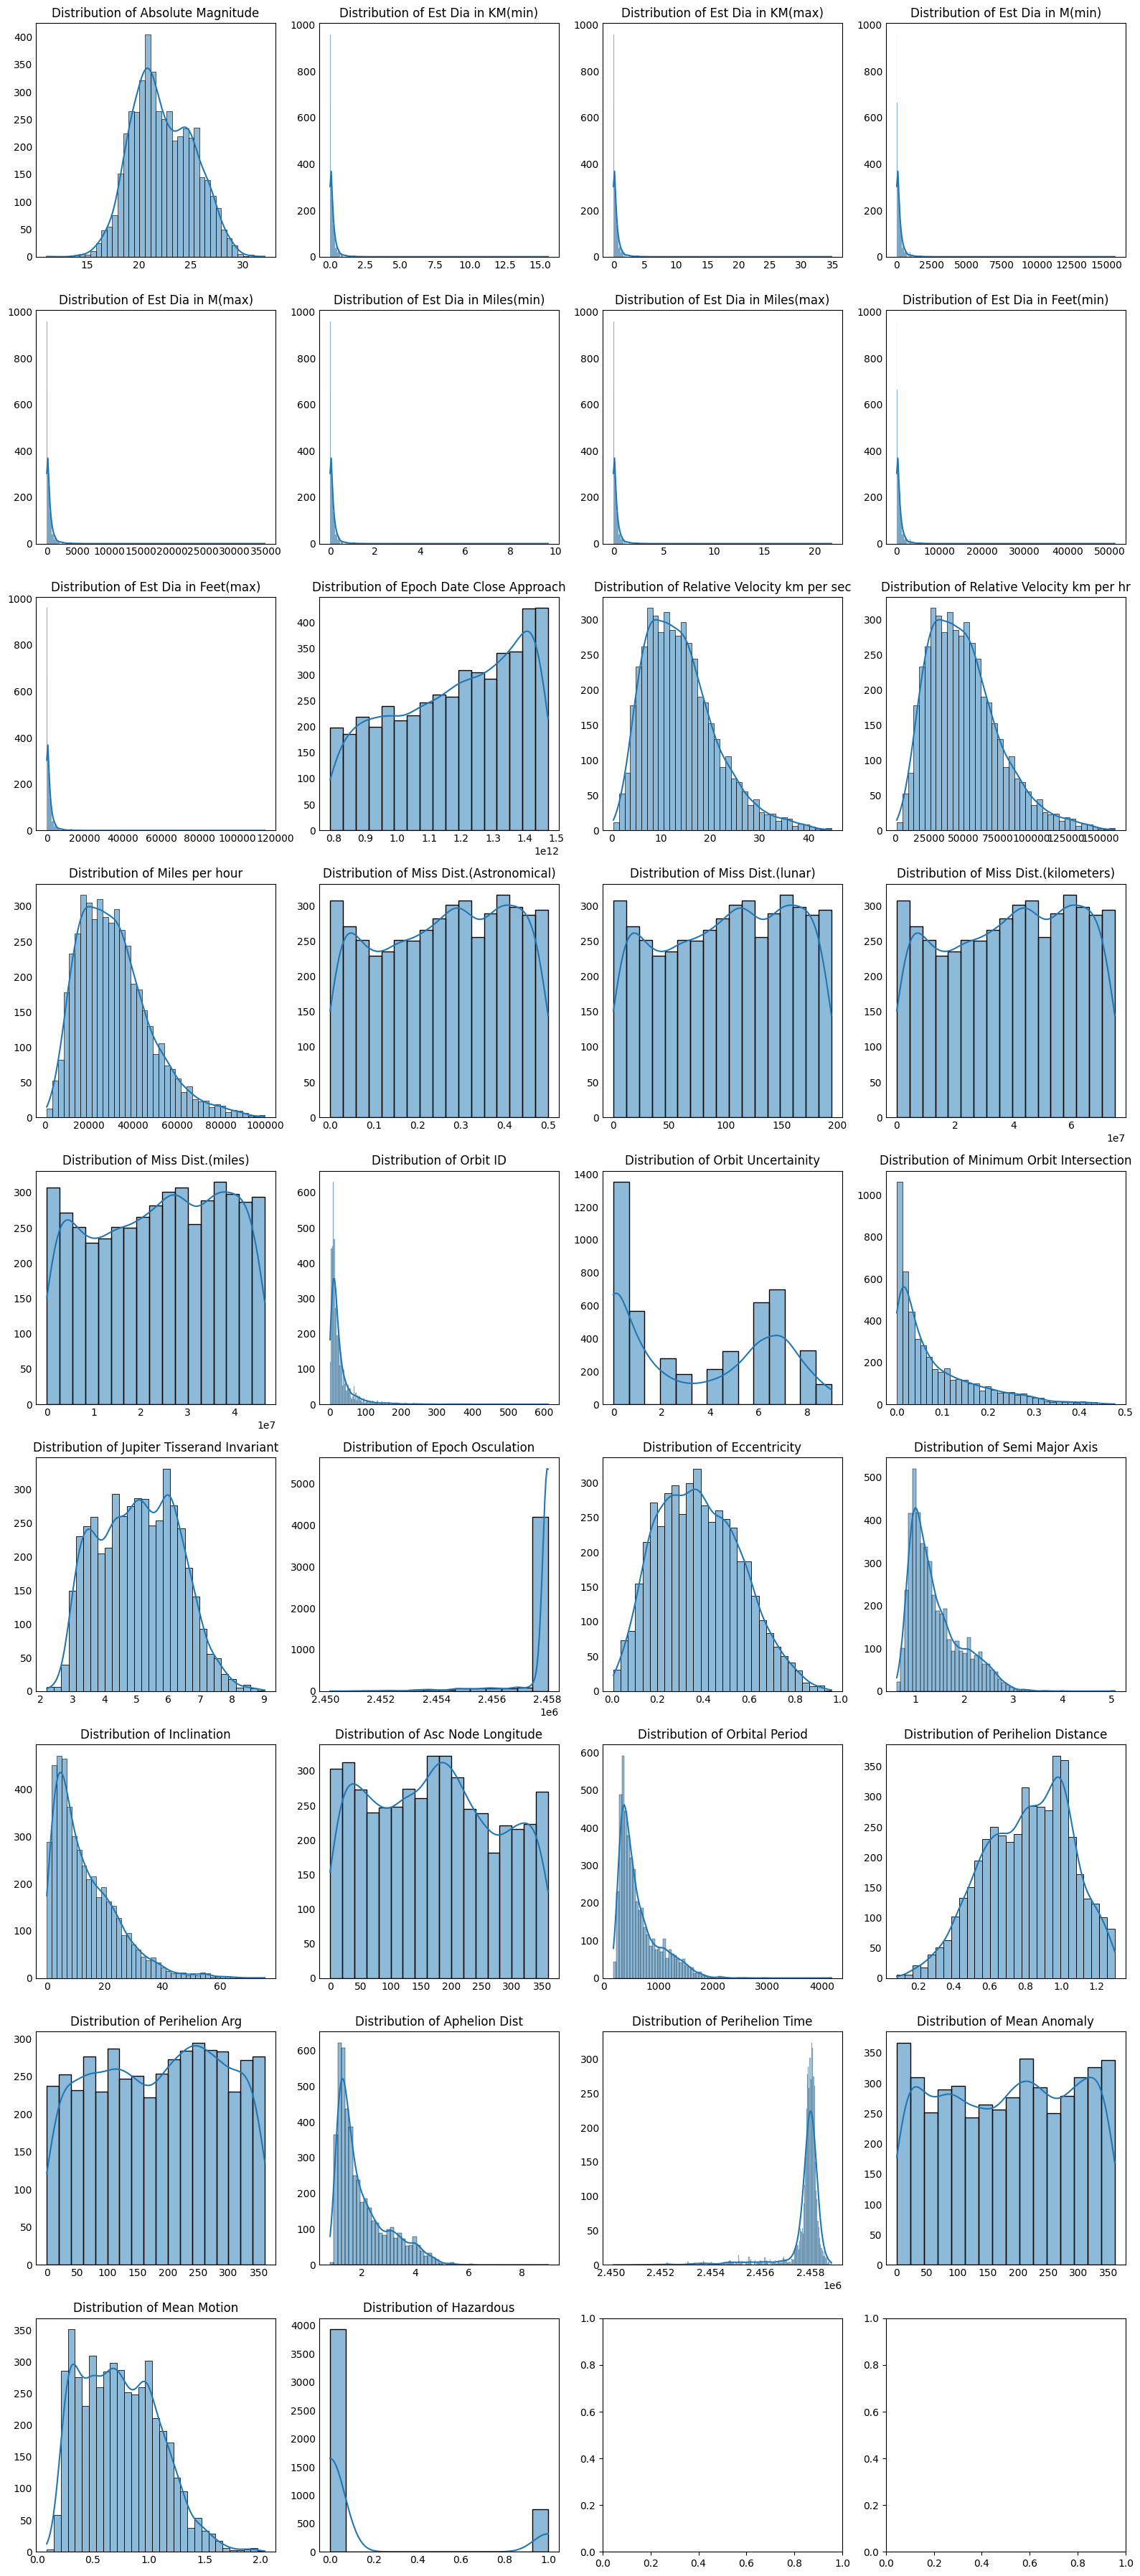

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_column_distributions(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 4)

    figure, axes = plt.subplots(figsize=(16, num_rows * 4), nrows=num_rows, ncols=4)

    for idx, col in enumerate(df.columns):
        ax = axes[idx // 4, idx % 4]
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.tick_params(axis='both', which='both', length=0)

    figure.tight_layout()
    plt.show()

plot_column_distributions(df)


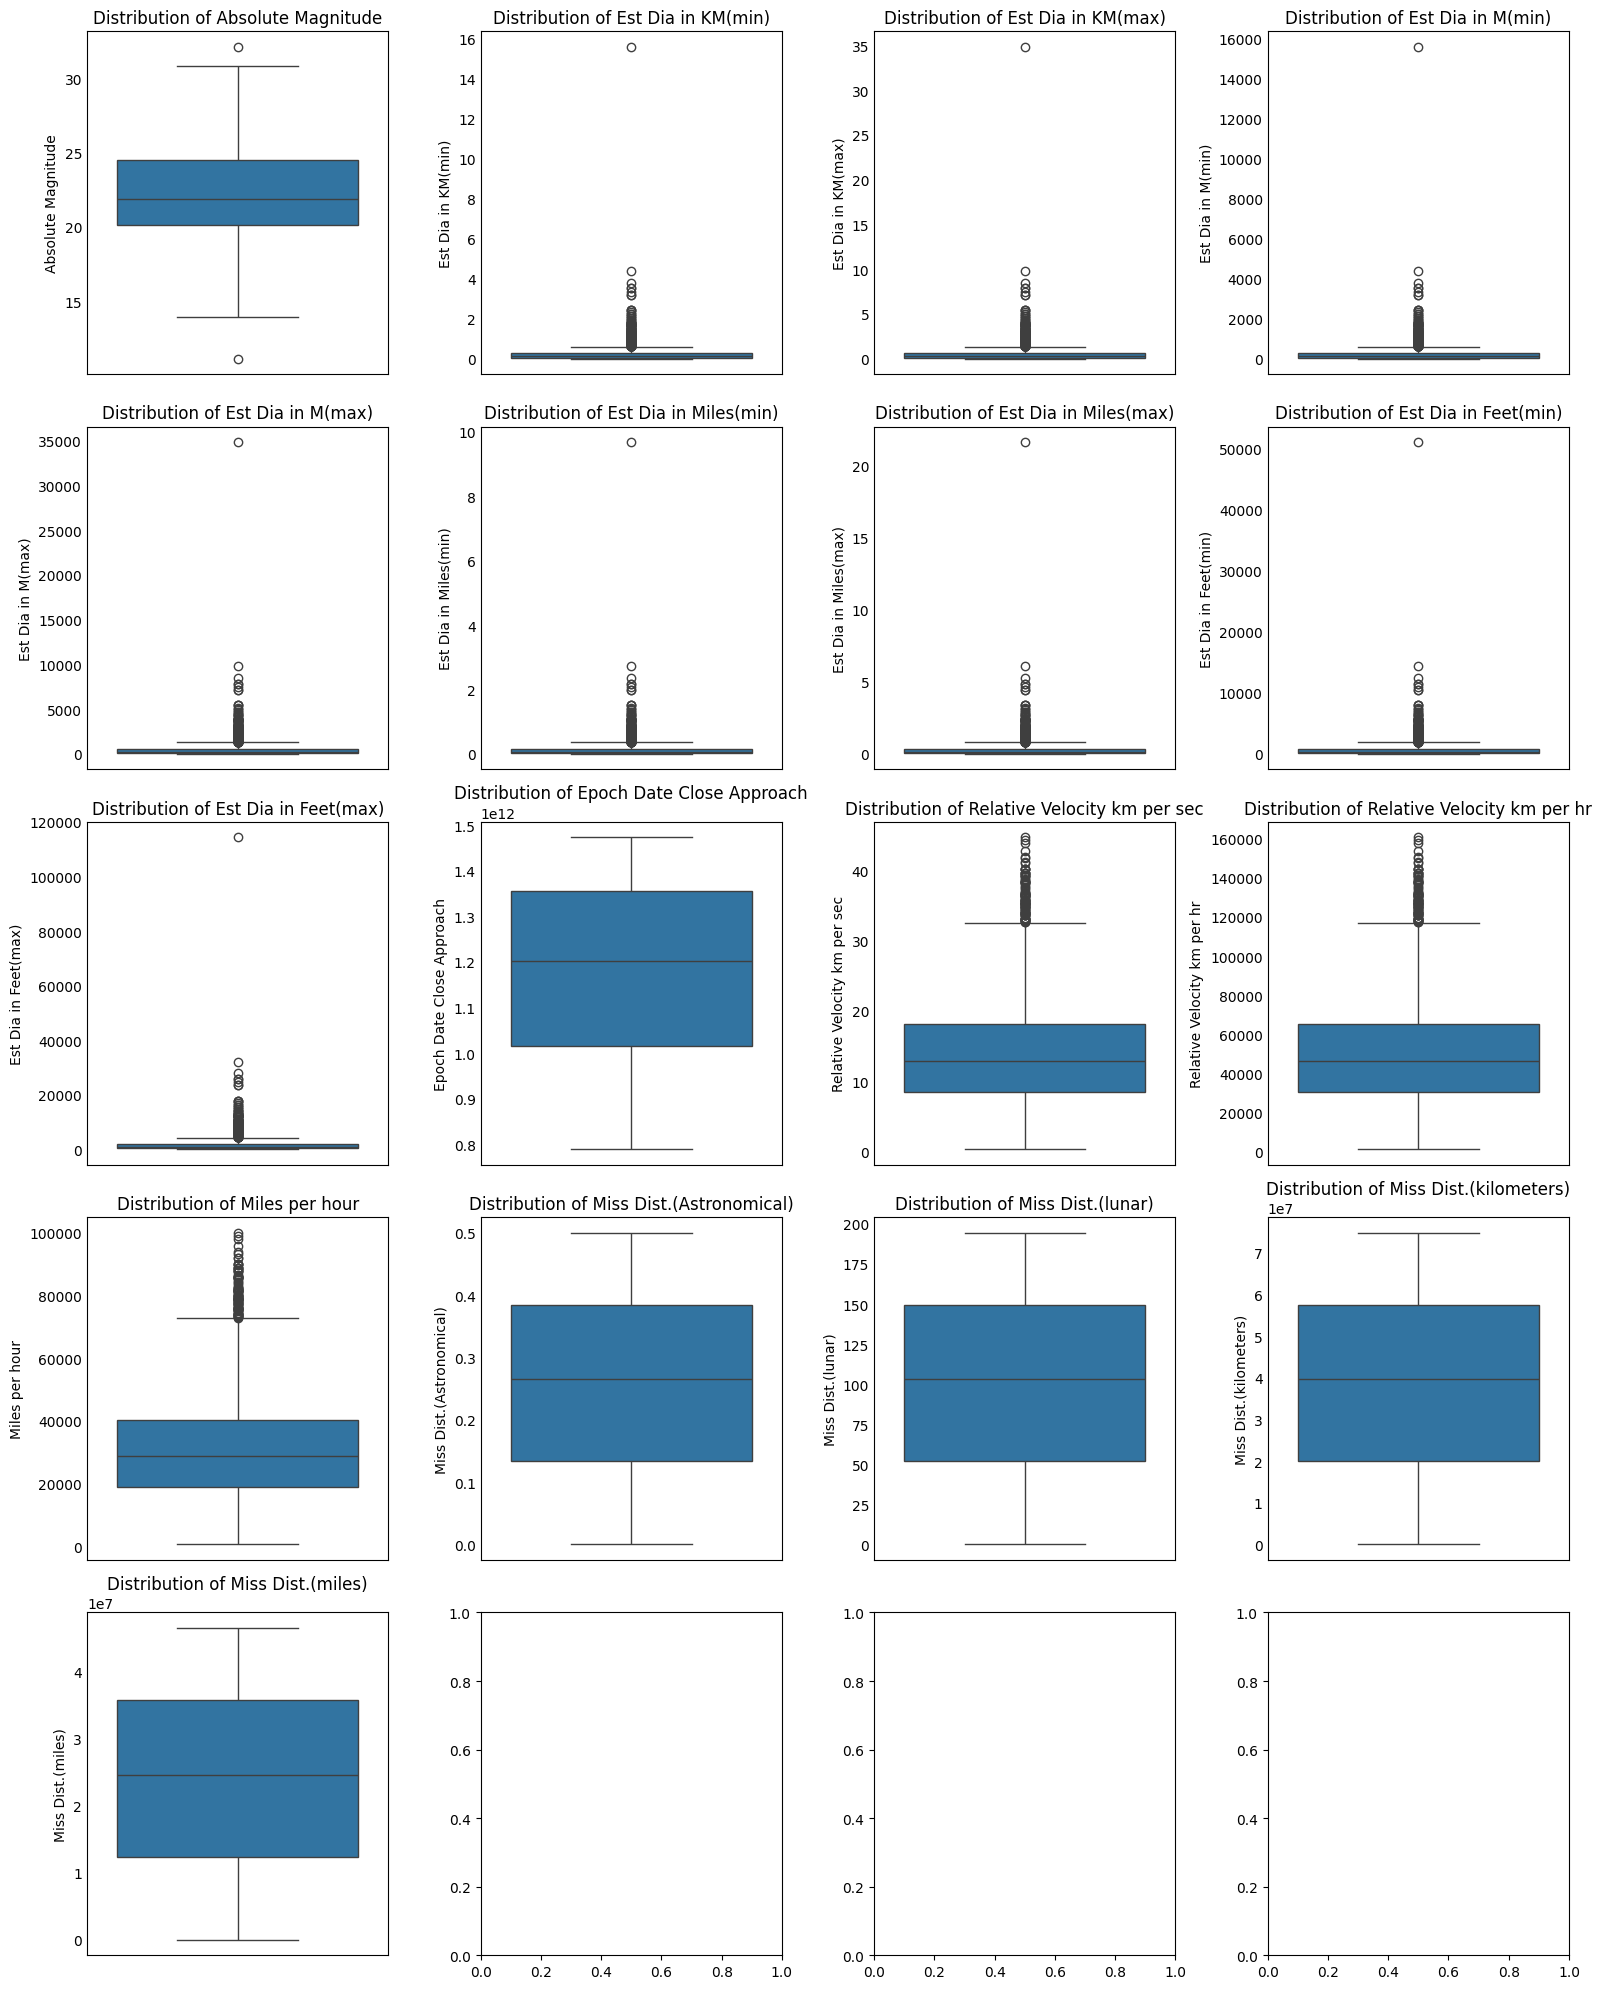

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

first_half = len(df.columns) // 2

def plot_column_boxplots(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 4)

    figure, axes = plt.subplots(figsize=(16, num_rows * 4), nrows=num_rows, ncols=4)

    for idx, col in enumerate(df.columns):
        ax = axes[idx // 4, idx % 4]
        sns.boxplot(df[col], ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(None)
        ax.tick_params(axis='both', which='both', length=0)

    figure.tight_layout()
    plt.show()

plot_column_boxplots(df[df.columns[:first_half]])


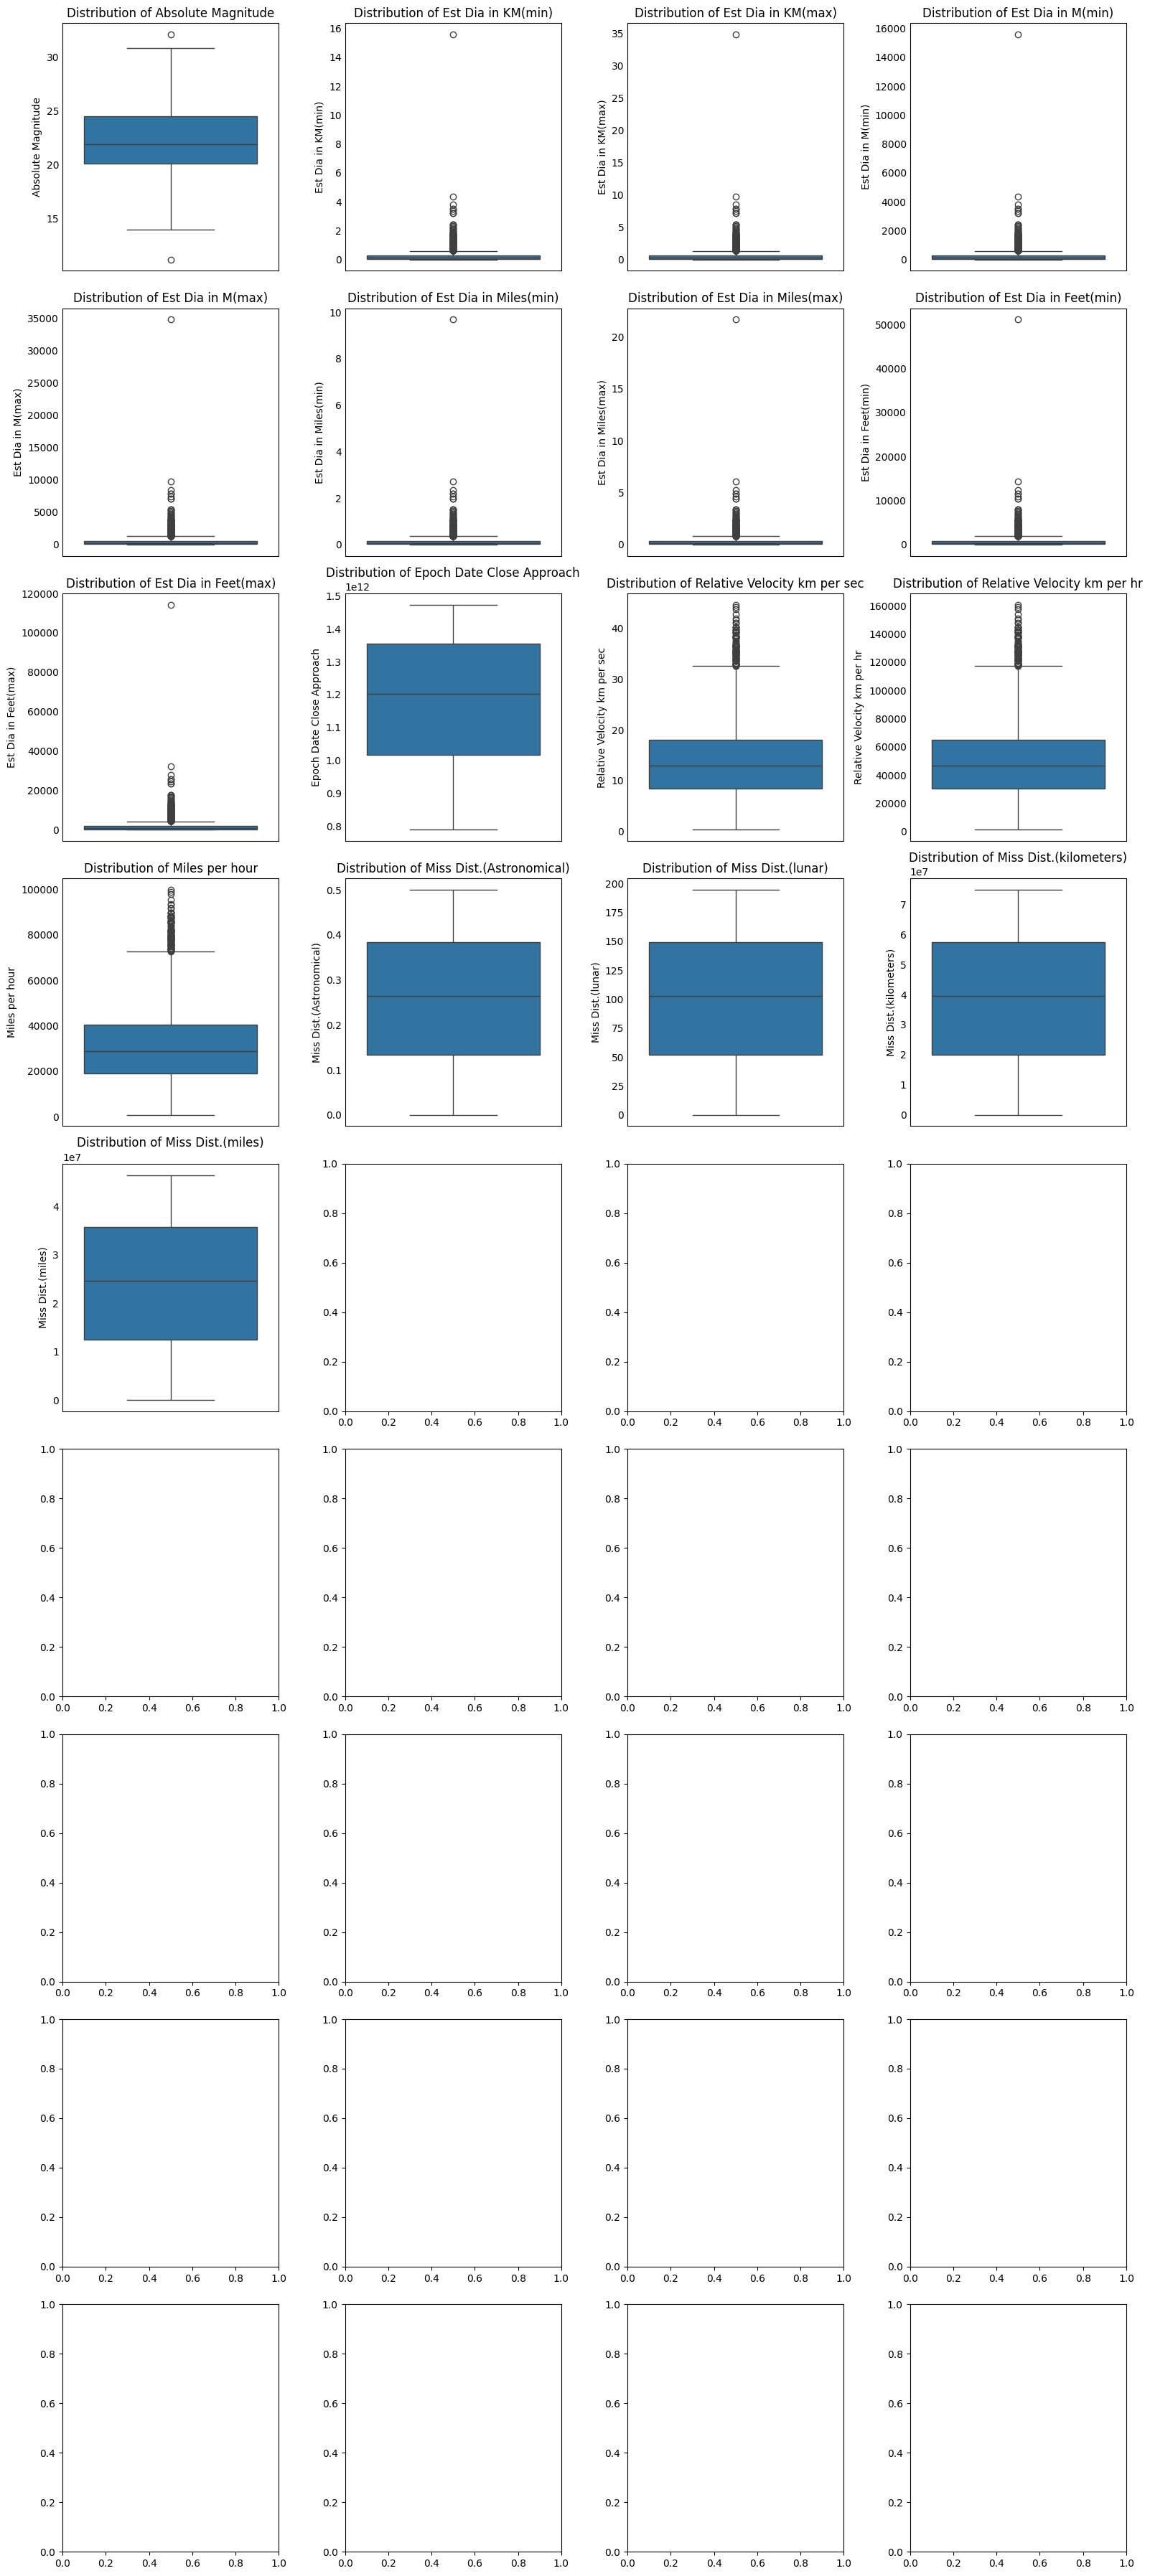

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_column_boxplots(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 4)

    fig, axes = plt.subplots(figsize=(16, num_rows * 4), nrows=num_rows, ncols=4)

    for idx, col in enumerate(df.columns[:num_cols//2]):
        sns.boxplot(df[col], ax=axes[idx // 4, idx % 4])
        axes[idx // 4, idx % 4].set_title(f"Distribution of {col}")
        axes[idx // 4, idx % 4].set_xlabel(None)
        axes[idx // 4, idx % 4].tick_params(axis='both', which='both', length=0)

    fig.tight_layout()
    plt.show()

plot_column_boxplots(df)


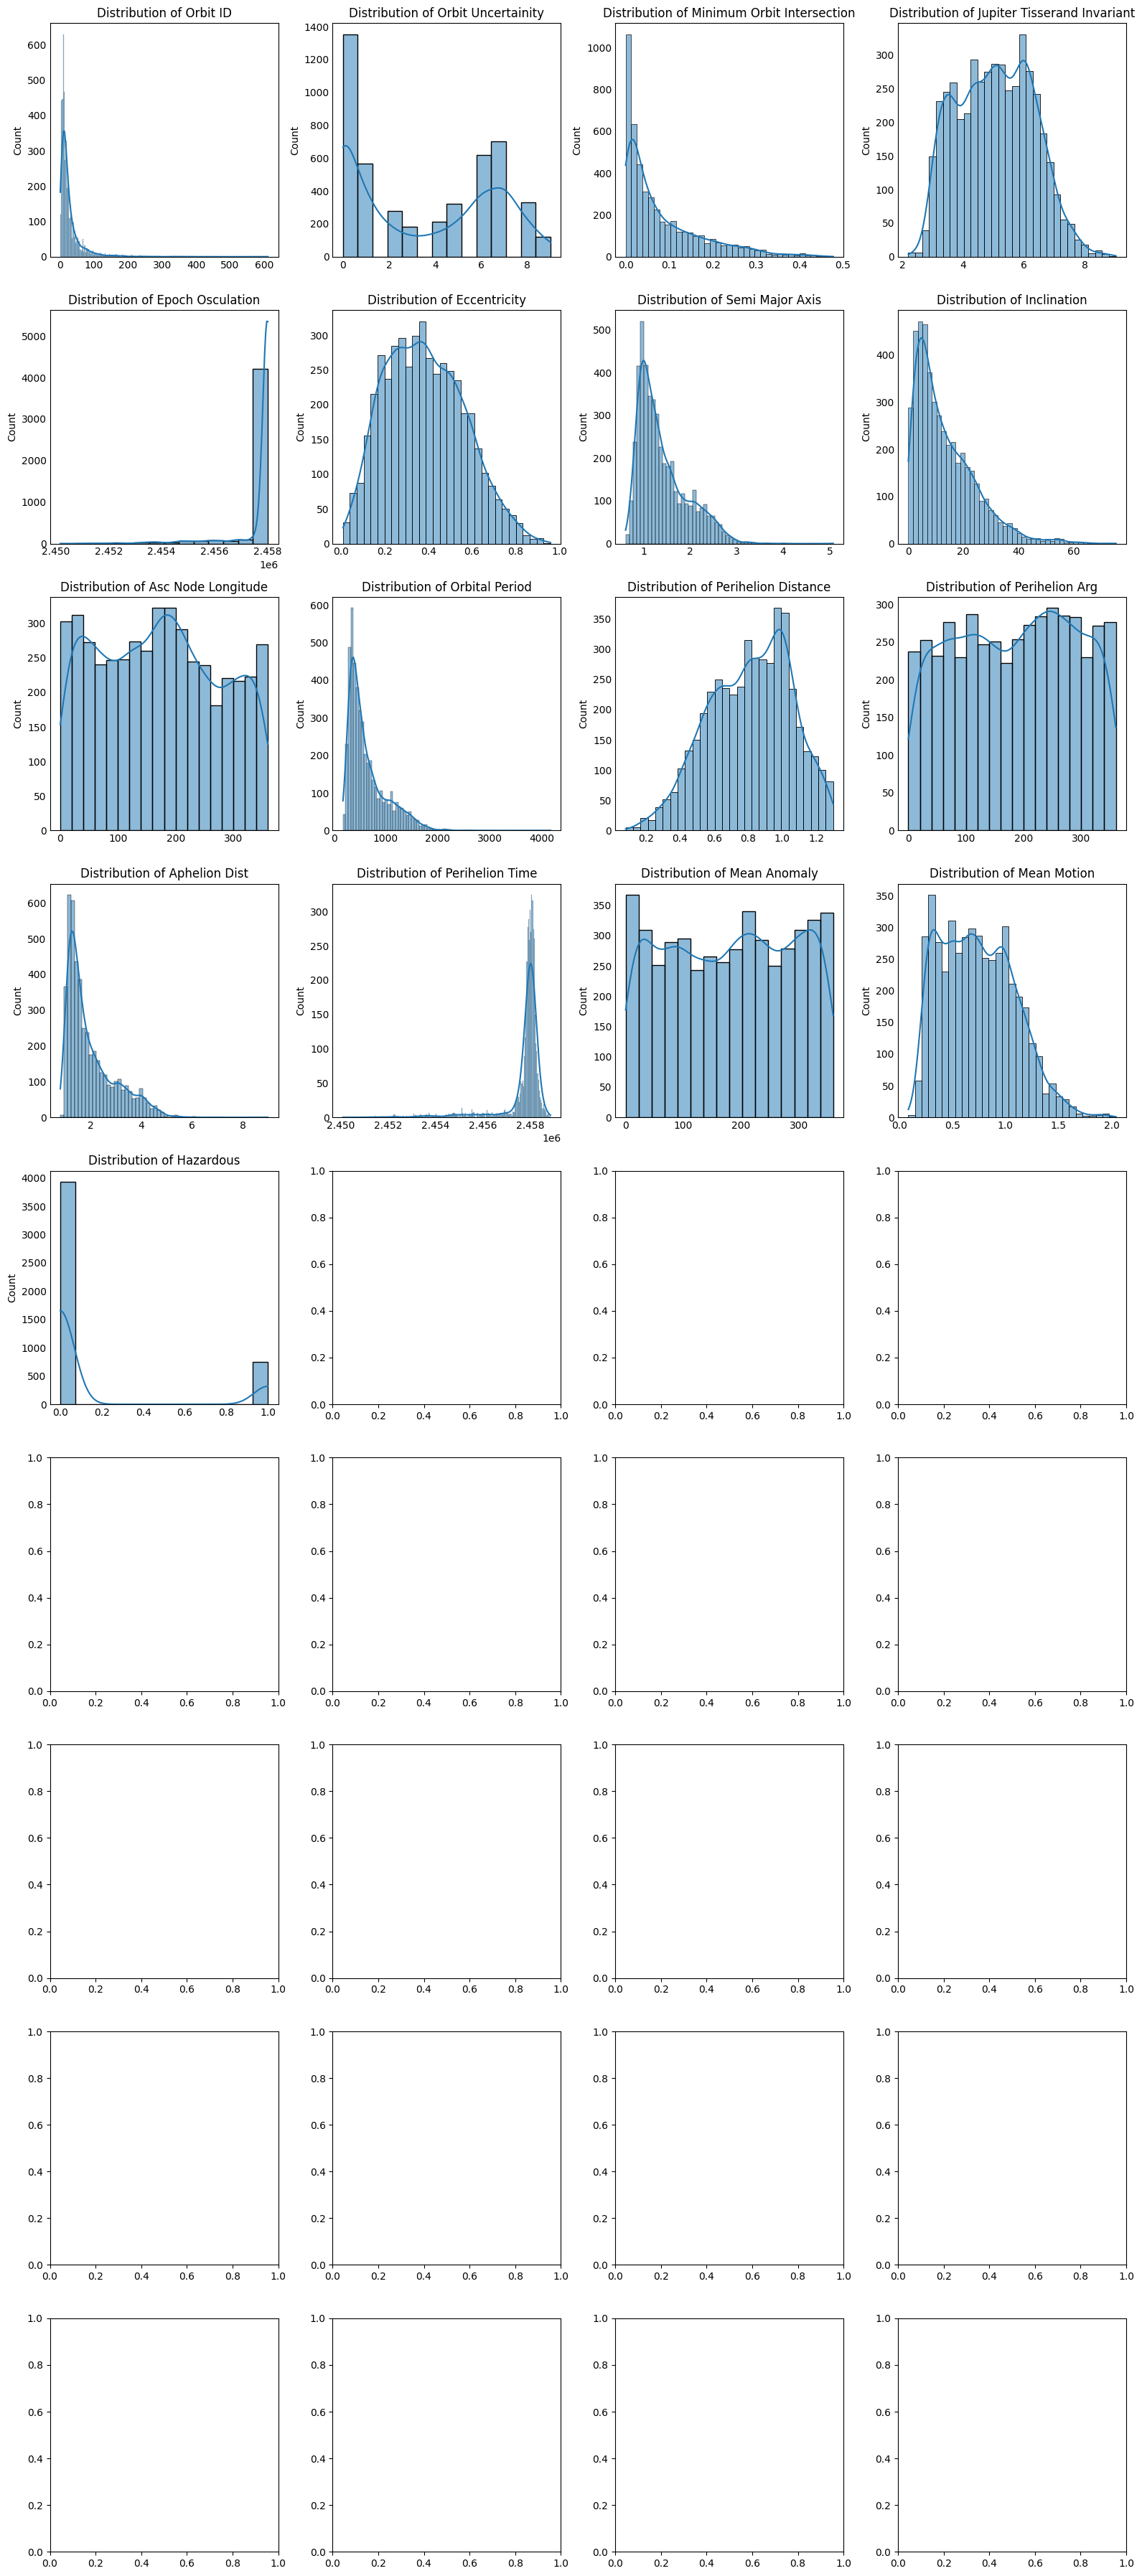

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_column_histplots(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 4)

    fig, axes = plt.subplots(figsize=(16, num_rows * 4), nrows=num_rows, ncols=4)

    for idx, col in enumerate(df.columns[num_cols//2:]):
        sns.histplot(df[col], kde=True, ax=axes[idx // 4, idx % 4])
        axes[idx // 4, idx % 4].set_title(f"Distribution of {col}")
        axes[idx // 4, idx % 4].set_xlabel(None)
        axes[idx // 4, idx % 4].tick_params(axis='both', which='both', length=0)

    fig.tight_layout()
    plt.show()

plot_column_histplots(df)


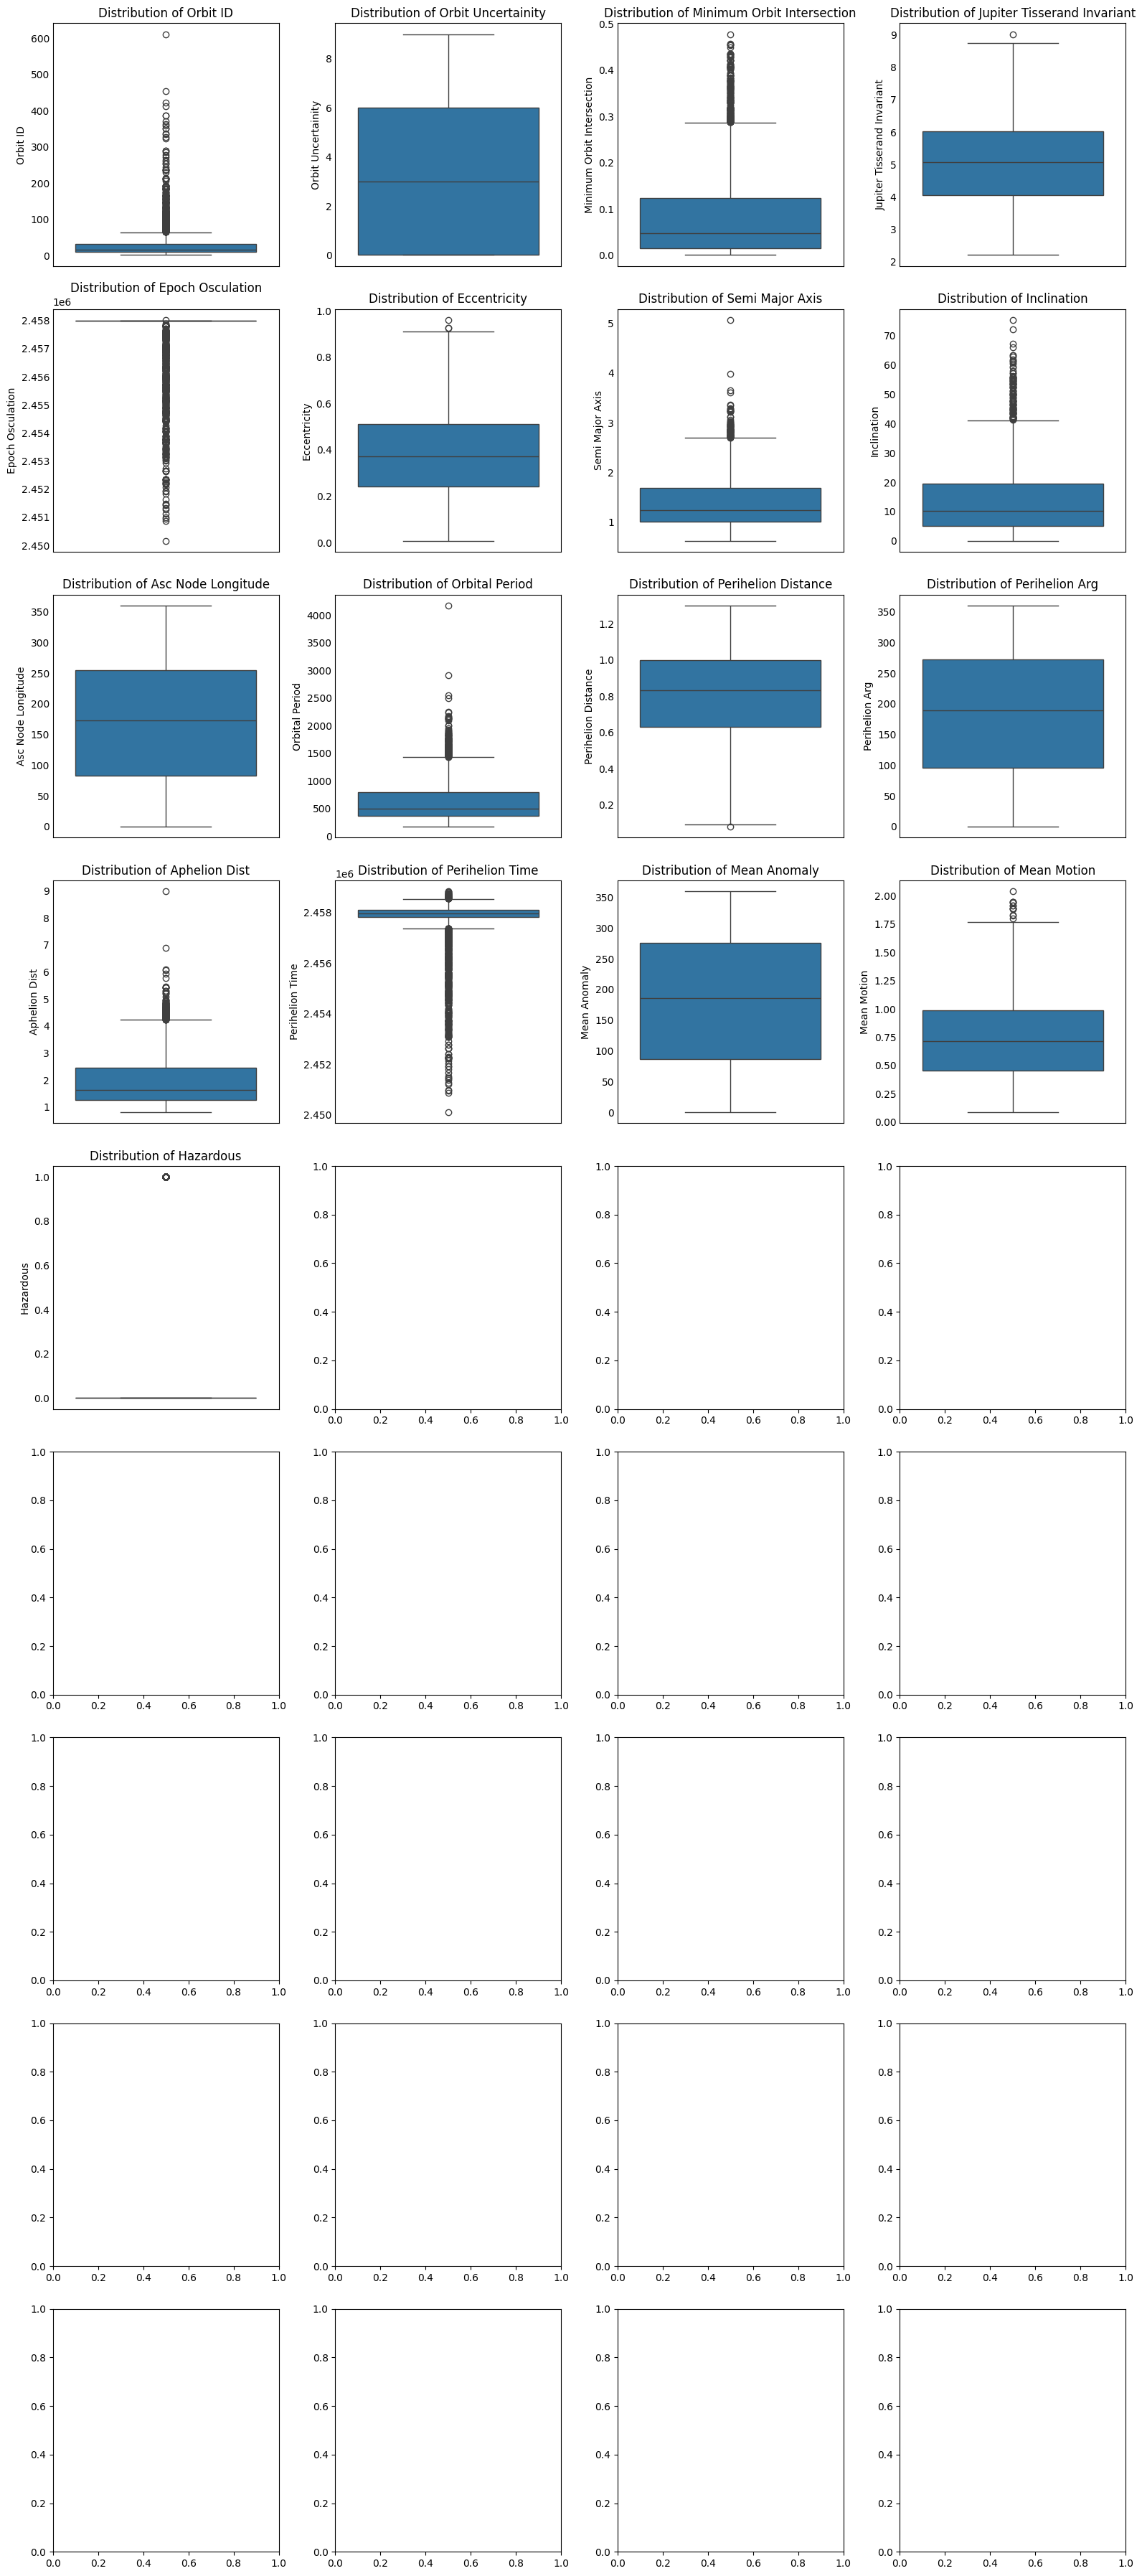

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_column_boxplots(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 4)

    fig, axes = plt.subplots(figsize=(16, num_rows * 4), nrows=num_rows, ncols=4)

    for idx, col in enumerate(df.columns[num_cols//2:]):
        sns.boxplot(df[col], ax=axes[idx // 4, idx % 4])
        axes[idx // 4, idx % 4].set_title(f"Distribution of {col}")
        axes[idx // 4, idx % 4].set_xlabel(None)
        axes[idx // 4, idx % 4].tick_params(axis='both', which='both', length=0)

    fig.tight_layout()
    plt.show()

plot_column_boxplots(df)


In [8]:
df["Hazardous"] = df["Hazardous"].apply(lambda x : 1 if x == True else 0)

In [9]:
df["Hazardous"].value_counts()

Hazardous
0    3932
1     755
Name: count, dtype: int64

In [10]:
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [11]:
entropy_df = calculate_entropy(df)
entropy_df

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
entropy,7.008145,7.008145,7.008145,7.008145,7.008145,7.008145,7.008145,7.008145,7.008145,9.434939,...,11.723491,11.723491,11.723491,11.723491,11.723491,11.723491,11.723491,11.723491,11.723491,0.636896


In [12]:
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from collections import Counter

last_ix = len(df.columns) - 1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]

def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    metric = make_scorer(f2_measure)
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

def main():
    last_ix = len(df.columns) - 1
    X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
    print(X.shape, y.shape, Counter(y))

    model = DummyClassifier(strategy='constant', constant=1)
    scores = evaluate_model(X, y, model)

    print('Mean F2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

if __name__ == "__main__":
    main()


(4687, 33) (4687,) Counter({0: 3932, 1: 755})


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean F2: 0.490 (0.002)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,DecisionTreeClassifier,0.995736
3,RandomForestClassifier,0.995736
5,GradientBoostingClassifier,0.995736
0,LogisticRegression,0.948827
1,SVC,0.943497
6,GaussianNB,0.928571
7,LDA,0.902985
8,GPC,0.900853
4,KNeighborsClassifier,0.892324


In [14]:
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,DecisionTreeClassifier,0.995736
3,RandomForestClassifier,0.995736
5,GradientBoostingClassifier,0.995736
1,SVC,0.936034
8,GPC,0.930704
6,GaussianNB,0.928571
0,LogisticRegression,0.924307
7,LDA,0.902985
4,KNeighborsClassifier,0.866738


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    metric = make_scorer(f2_measure)
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

def get_models():
    models, names = list(), list()

    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')

    models.append(RandomForestClassifier())
    names.append('RFC')

    models.append(GradientBoostingClassifier())
    names.append('GBC')

    models.append(KNeighborsClassifier())
    names.append('KNN')

    models.append(SVC())
    names.append('SVC')

    models.append(LogisticRegression())
    names.append('LR')

    return models, names

last_ix = len(df.columns) - 1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
models, names = get_models()
results = list()

for i in range(len(models)):
    pipeline = Pipeline(steps=[('scaler', MinMaxScaler()), ("power_transformer", PowerTransformer()), ('model', models[i])])
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


>LDA 0.749 (0.047)
>RFC 0.987 (0.015)
>GBC 0.986 (0.014)
>KNN 0.691 (0.052)
>SVC 0.896 (0.026)
>LR 0.748 (0.054)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd

def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, yhat)
    class_report = classification_report(y_test, yhat)
    accuracy = accuracy_score(y_test, yhat)

    return conf_matrix, class_report, accuracy

def get_models():
    models, names = list(), list()

    models.append(RandomForestClassifier())
    names.append('RFC')

    models.append(GradientBoostingClassifier())
    names.append('GBC')

    models.append(SVC())
    names.append('SVC')

    return models, names

models, names = get_models()

for i in range(len(models)):

    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ("power_transformer", PowerTransformer()), ('model', models[i])])

    conf_matrix, class_report, accuracy = evaluate_model(X_train, X_test, y_train, y_test, pipeline)

    print(f"Model: {names[i]}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("\nAccuracy:", accuracy)
    print("------------------------")


Model: RFC

Confusion Matrix:
 [[790   1]
 [  2 145]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938


Accuracy: 0.9968017057569296
------------------------
Model: GBC

Confusion Matrix:
 [[789   2]
 [  2 145]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938


Accuracy: 0.9957356076759062
------------------------
Model: SVC

Confusion Matrix:
 [[783   8]
 [ 17 130]]

Classification Report:


Model: RFC, Accuracy: 0.997, F2 Score: 0.989


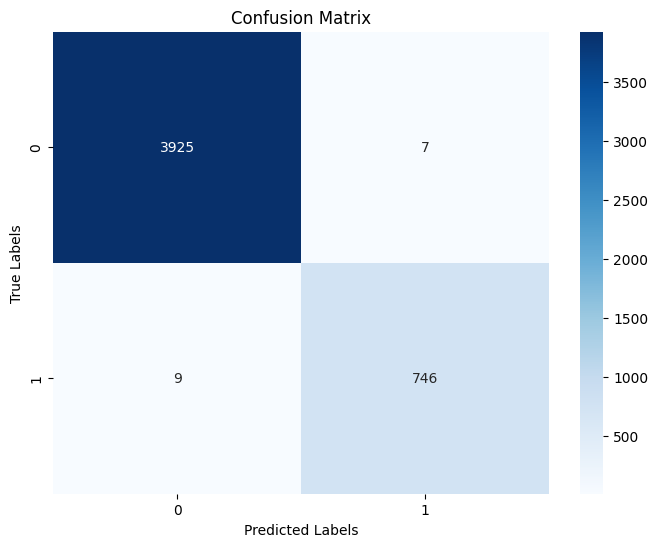

Model: GBC, Accuracy: 0.996, F2 Score: 0.986


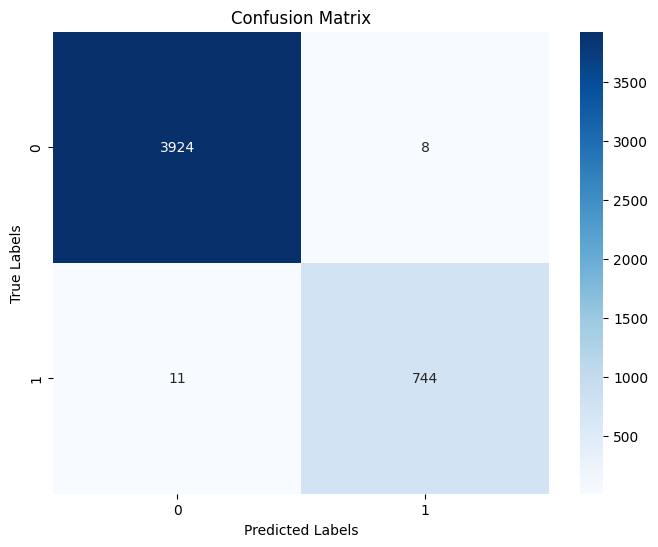

Model: SVC, Accuracy: 0.969, F2 Score: 0.896


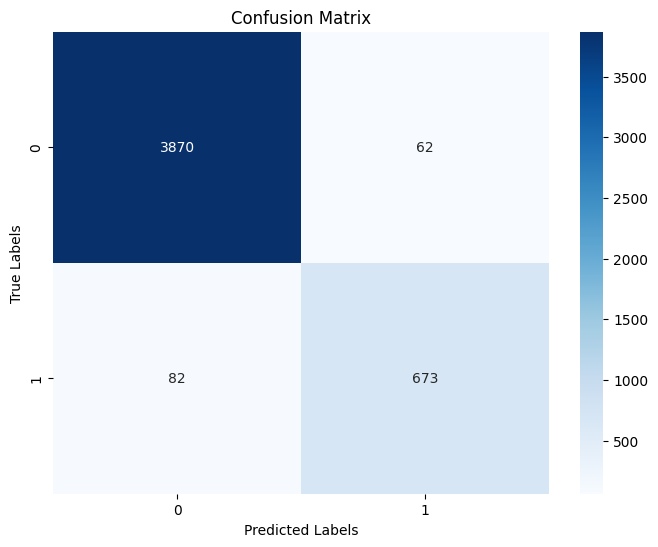

  Model  Accuracy  F2 Score
0   RFC  0.996586  0.988603
1   GBC  0.995946  0.986214
2   SVC  0.969277  0.896138


In [18]:
from sklearn.calibration import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import accuracy_score, fbeta_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

def get_models():
    models, names = list(), list()

    models.append(RandomForestClassifier())
    names.append('RFC')

    models.append(GradientBoostingClassifier())
    names.append('GBC')

    models.append(SVC())
    names.append('SVC')
    return models, names

models, names = get_models()
model_performance = []

for i in range(len(models)):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('power_transformer', PowerTransformer()),
        ('model', models[i])
    ])

    y_pred = cross_val_predict(pipeline, X, y, cv=10)

    accuracy = accuracy_score(y, y_pred)
    f2 = f2_measure(y, y_pred)

    model_performance.append({
        "Model": names[i],
        "Accuracy": accuracy,
        "F2 Score": f2
    })

    print(f"Model: {names[i]}, Accuracy: {accuracy:.3f}, F2 Score: {f2:.3f}")

    conf_mat = confusion_matrix(y, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

performance_df = pd.DataFrame(model_performance)
print(performance_df)


In [19]:
#undersampling method

from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, NeighbourhoodCleaningRule, OneSidedSelection
from imblearn.pipeline import Pipeline as imblearnPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score
import numpy as np
import pandas as pd

def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    metric = make_scorer(f2_measure)

    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

def get_models():
    models, names = list(), list()

    models.append(TomekLinks())
    names.append('TL')

    models.append(EditedNearestNeighbours())
    names.append('ENN')

    models.append(RepeatedEditedNearestNeighbours())
    names.append('RENN')

    models.append(OneSidedSelection())
    names.append('OSS')

    models.append(NeighbourhoodCleaningRule())
    names.append('NCR')
    return models, names

last_ix = len(df.columns)-1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
models, names = get_models()

for i in range(len(models)):

    model = RandomForestClassifier()
    pipeline = imblearnPipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('power_transformer', PowerTransformer()),
        ('s', models[i]),
        ('m', model)
    ])

    scores = evaluate_model(X, y, pipeline)

    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))


>TL 0.987 (0.012)
>ENN 0.991 (0.011)
>RENN 0.989 (0.010)
>OSS 0.989 (0.014)
>NCR 0.989 (0.009)


In [20]:
#oversampling technique

from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN
from imblearn.pipeline import Pipeline as imblearnPipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score
import numpy as np
import pandas as pd

def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    metric = make_scorer(f2_measure)

    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

def get_models():
    models, names = list(), list()

    models.append(SMOTE())
    names.append('SMOTE')

    models.append(BorderlineSMOTE())
    names.append('BLS')

    models.append(ADASYN())
    names.append('ADASYN')
    return models, names

last_ix = len(df.columns)-1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
models, names = get_models()

for i in range(len(models)):

    model = RandomForestClassifier()
    pipeline = imblearnPipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('power_transformer', PowerTransformer()),
        ('s', models[i]),
        ('m', model)
    ])

    scores = evaluate_model(X, y, pipeline)

    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))


>SMOTE 0.988 (0.013)
>BLS 0.992 (0.010)
>ADASYN 0.991 (0.011)


In [21]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imblearnPipeline

def f2_measure(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  metric = make_scorer(f2_measure)

  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

def get_models():
  models, names = list(), list()

  models.append(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')))
  names.append('SMOTE-TOMEK')

  models.append(SMOTEENN())
  names.append('SMOTE + KKN')
  return models, names

last_ix = len(df.columns)-1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
models, names = get_models()

for i in range(len(models)):

  model = RandomForestClassifier()
  pipeline = imblearnPipeline(steps=[('scaler', MinMaxScaler()),("power_tranformer",PowerTransformer()),('s', models[i]), ('m', model)])

  scores = evaluate_model(X, y, pipeline)

  print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>SMOTE-TOMEK 0.990 (0.013)
>SMOTE + KKN 0.991 (0.008)
